In [11]:
%%html
<style type="text/css">
.CodeMirrore{
    font-size: 25px;
}
</style>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

for ead a file 

for read a file

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


 in our data set strok is our out put 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB






in our data set there is 5110 entries 




In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


         
    
    descrbe data 
    
               here large gap between mean and std values
        
        
        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014E586E9E08>,
      dtype=object)

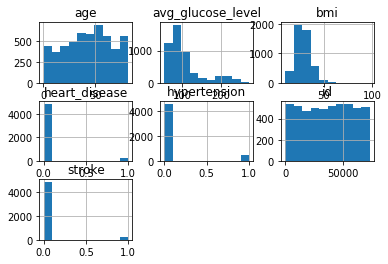

In [7]:
df.hist()



in age F we have normal distibution

in avg_glucose_level we have not good distibution 

there are three feature have best corr. between them



feature Selection

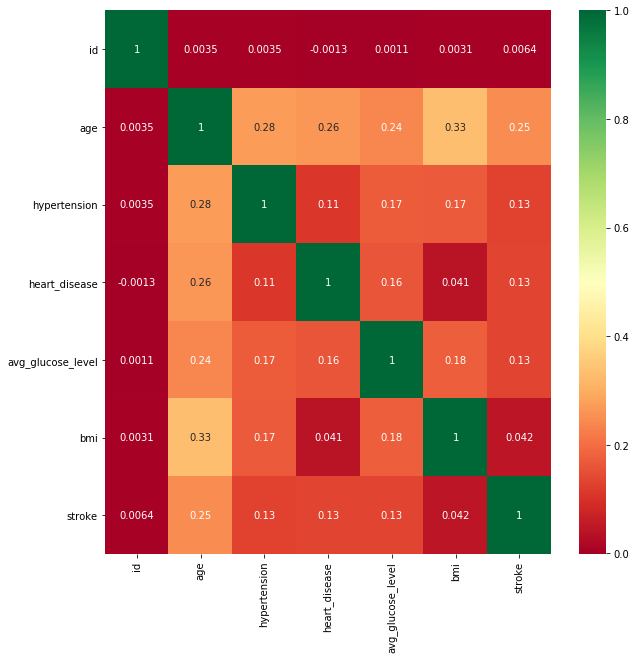

In [8]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

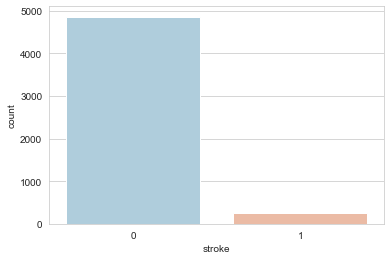

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='stroke',data=df,palette='RdBu_r')

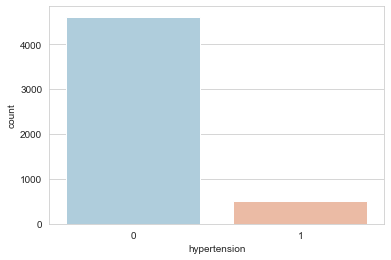

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='hypertension',data=df,palette='RdBu_r')

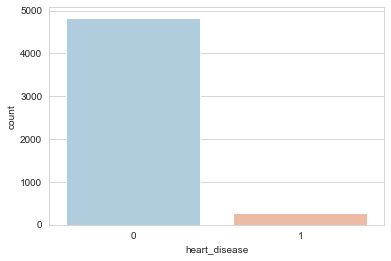

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='heart_disease',data=df,palette='RdBu_r')

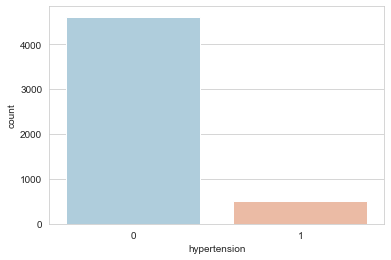

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='hypertension',data=df,palette='RdBu_r')

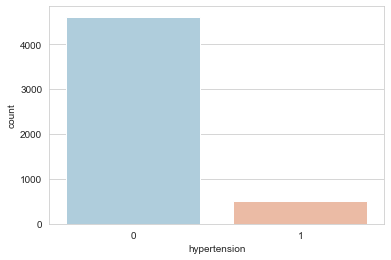

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='hypertension',data=df,palette='RdBu_r')

first we should import seaborn 
and in seaborn there is a function call set_style() here we set style of grid 

and send one is a countplot()
in this fuction we give x as our peramiter and also give data set name and  
there is paltte variable its value is a couler you want

In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



in our data  set use less is id here id is not a use for resulte 



In [15]:
data=df.drop('id',axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1





here we check a unique value in each features 

 by unique fuction 
    
    
    

In [16]:
catfeatures = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
for catfeature in catfeatures:
    print(data[catfeature].unique())


['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [17]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<font color="red">   in our data lotsoff null value tooo
  find null value we use fuction isna() and also use sum() function forsum a null value 
    </font>

***

In [18]:
data['smoking_status'].replace('Unknown', np.nan, inplace=True)
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', nan], dtype=object)

***

<font color="red">   in this cell in smoking_status we have  Unknown value but 
  <br> in palce of uknown we use a null value so we <br>need to convert unknon too null<br>
    so we use replace fution to replce value </font>

***

In [19]:
data.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [20]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
data['smoking_status'].fillna(data['smoking_status'].mode()[0],inplace=True)
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

***

<font color="red"> in this cell in our data set two feature have null value we need too replace this nullvalue <br>
   - in bmi we use mean value be.. normal dis.-<br>
    - in smoking stuts we use mode value be . there are only sring yes/no </font>

***

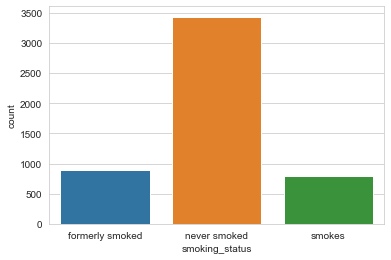

In [21]:
sns.countplot(x=data['smoking_status'])

<function matplotlib.pyplot.show(*args, **kw)>

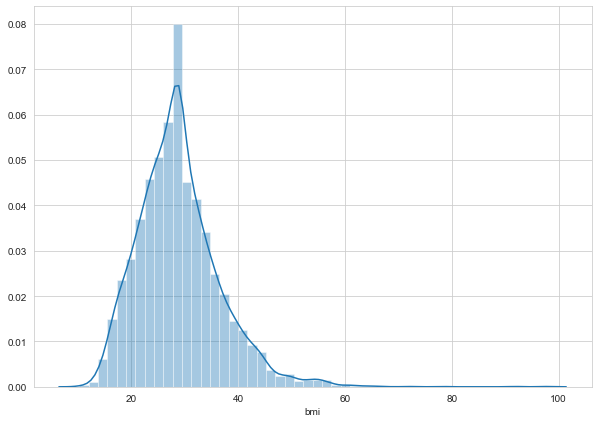

In [22]:
plt.figure(figsize=(10,7))
sns.distplot(data['bmi'])
plt.show

In [24]:
le = LabelEncoder()
en_data =data.apply(le.fit_transform)
en_data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1


***

<font color="red">  this cell is more important becouse here we remove all string value and replace with zero and one or any other value<br>
  -first we need from sklearn.preprocessing import LabelEncoder <br> in this line LabelEncoder is  class-
  -creat a object of class-<br>
-apply fit_transform on object with our data set-</font>

# Feature Selection

***

In [34]:
y = en_data['stroke']
X = en_data.drop('stroke',axis=1)


<font color="red">  in this cell our stroke is a output so <br>
- we give a stroke colume in y<br>
- we give our data in x without stroke colume</font>

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***

<font color="red"> for split our data set <br>
- we need import train test split from modle selection <br>
- we creat x y obeject of train test by train_test_split class<br>
- in this class we give x , y data set and our test size and random state snd straitify=y<br

></font>

In [ ]:
<font color="red">  for change unit of all feature on  </font>

In [38]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred  = model_rf.predict(X_test)

In [39]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [47]:
print('the training score of RF is :{:.3f}%'.format(model_rf.score(X_train,y_train)*100))

the training score of RF is :100.000%


In [45]:
print(" the confusion matrix of RF is :\n {} \n".format(confusion_matrix(y_test,y_pred)))

 the confusion matrix of RF is :
 [[1602    3]
 [  82    0]] 



In [46]:
print("The classification report:\n {} \n".format(classification_report(y_test,y_pred)))

The classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1605
           1       0.00      0.00      0.00        82

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.91      0.95      0.93      1687
 



In [48]:
print("The Accuracy Score of RandomForestClassifier is: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

The Accuracy Score of RandomForestClassifier is: 94.961%
